# MPSlib: Using a sparse TI
An example of using a sparse training image with MPSLib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


In [2]:
# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [128,128,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[128,128,1])
#O = mps.mpslib(method='mps_genesim', simulation_grid_size=[128,128,1])

#O.parameter_filename = 'mps_sparseti.txt'
O.par['debug_level']=-1
O.par['n_cond']=25
O.par['n_real']=32
O.par['n_threads']=8



Using mps_snesim_tree installed in /mnt/c/Users/thoma/PROGRAMMING/mpslib (scikit-mps in /mnt/c/Users/thoma/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


# Setup sparse TI 
All values of -997799 will be treated as missing data
One can also use ''np.NAN'' to define missing data


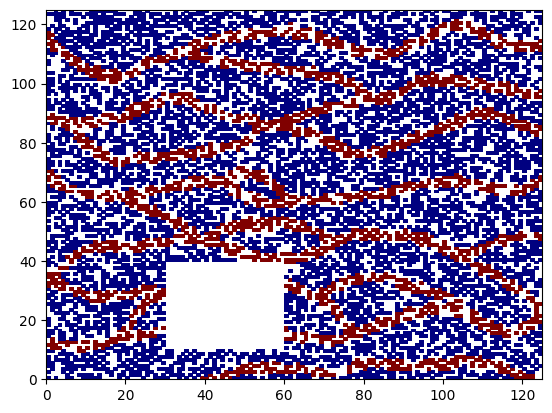

In [3]:
#TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=0)
nanval=-997799
nanval = np.NAN
TI2=TI;
TI2[30:60,10:40]=nanval

n=10000;
ixx=np.random.randint(0,TI.shape[0],n)
iyy=np.random.randint(0,TI.shape[1],n)
for i in range(n):
    TI2[iyy[i],ixx[i]]=nanval

O.ti = TI2
O.par['ti_fnam']='ti_sparse.ti'

plt.pcolor(O.ti[:,:,0].T,cmap ='jet')

In [4]:
d_hard =  arr = np.empty((0,4), int)
for ix in np.arange(O.ti.shape[0]):
    for iy in np.arange(O.ti.shape[1]):
        if (O.ti[iy,ix,0]>-1):            
            d_hard = np.append(d_hard, np.array([[iy,ix,0,O.ti[iy,ix,0]]]), axis=0)
O.d_hard = d_hard   
print(O.d_hard.shape)
print(O.ti.shape)
print(125*125)

(7759, 4)
(125, 125, 1)
15625


In [5]:
#O.run()
O.run_parallel()



parallel: Using 8 of max 13 threads


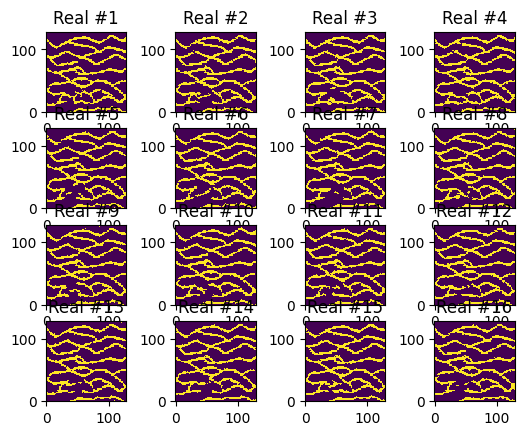

In [6]:
O.plot_reals()

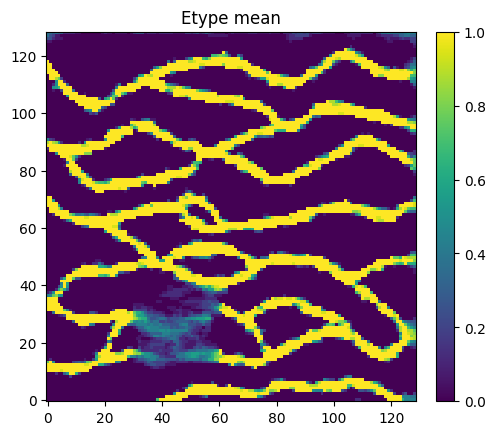

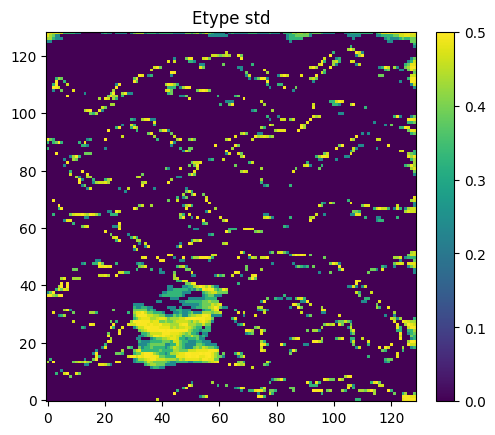

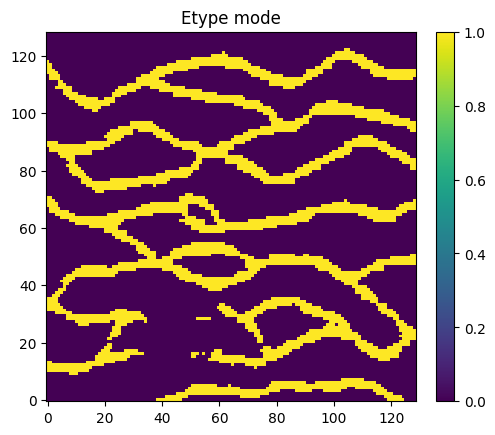

In [7]:
O.plot_etype()

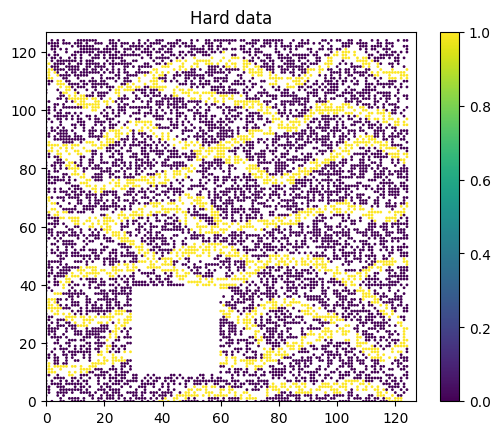

In [8]:
O.plot_hard()